<a href="https://colab.research.google.com/github/chandan110791/diarization_imp/blob/main/28_12_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# DAILY SETUP: Mounts Drive, Unzips Data, Pulls Code, Installs Deps
import os
import shutil
from google.colab import drive, userdata

print("🚀 INITIALIZING DAILY WORKFLOW...")

# 1. MOUNT DRIVE (To access your Zipped Data)
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')


🚀 INITIALIZING DAILY WORKFLOW...


In [2]:
# 3. PULL CODE (From Your GitHub)
REPO_URL = "https://github.com/chandan110791/diarization_imp.git"
REPO_DIR = "/content/diarization_imp"

In [2]:



if not os.path.exists(REPO_DIR):
    print("📥 Cloning Public Repository...")
    !git clone $REPO_URL $REPO_DIR
else:
    print("🔄 Pulling Latest Changes...")
    %cd $REPO_DIR
    !git pull


📥 Cloning Public Repository...
Cloning into '/content/diarization_imp'...
remote: Enumerating objects: 152, done.
remote: Total 152 (delta 0), reused 0 (delta 0), pack-reused 152 (from 1)
Receiving objects: 100% (152/152), 707.99 MiB | 13.71 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Updating files: 100% (126/126), done.


In [3]:
# 4. INSTALL DEPENDENCIES
# 4. ROBUST DEPENDENCY INSTALL (The "Clean Slate" Fix)
print("🔧 Configuring Environment...")
%cd $REPO_DIR

🔧 Configuring Environment...
/content/diarization_imp


In [4]:
###DANGEGROUS
# A. Force Uninstall conflicting libs (Fixes the "numpy>=2.0" errors)
print("   ...Cleaning up pre-installed incompatibilities...")
!pip uninstall -y torch torchvision torchaudio numpy sympy pyannote.audio pyannote.core pyannote.metrics jax jaxlib opencv-python shap -q

# B. Install The Golden Stack (Matches your requirements.txt exactly)
# We strictly define the order: Torch first, then the rest.
print("   ...Installing Stable Torch Stack (2.3.1)...")
!pip install torch==2.3.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu121 -q

print("   ...Installing Pyannote & Helpers...")
if os.path.exists("requirements.txt"):
    # We ignore the torch lines in requirements.txt since we just installed it above
    !grep -v "torch" requirements.txt > temp_reqs.txt
    !pip install -r temp_reqs.txt -q
    !rm temp_reqs.txt
else:
    # Fallback if file missing
    !pip install pyannote.audio==3.3.1 pyannote.metrics==3.2.1 pyannote.core==5.0.0 "numpy<2.0" "sympy==1.12" torch-geometric transformers==4.42.4 -q

# C. Verify
import torch
import pyannote.audio
print(f"✅ Environment Fixed: Torch {torch.__version__} | Pyannote {pyannote.audio.__version__}")



   ...Cleaning up pre-installed incompatibilities...
   ...Installing Stable Torch Stack (2.3.1)...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 719.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 108.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 104.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 139.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB ? eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [4]:
import torch
import pyannote.audio

print("🔍 SYSTEM DIAGNOSTICS:")
print(f"   • Torch Version:    {torch.__version__} (Should be 2.3.1+cu121)")
print(f"   • Pyannote Version: {pyannote.audio.__version__} (Should be 3.3.1)")
print(f"   • GPU Available:    {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"   • GPU Name:         {torch.cuda.get_device_name(0)}")
else:
    print("   ⚠️ WARNING: Running on CPU! Check Runtime > Change runtime type.")

try:
    from pyannote.audio import Pipeline
    print("   ✅ Pyannote Pipeline loaded successfully.")
except ImportError as e:
    print(f"   ❌ Import Failed: {e}")

'AMI.SpeakerDiarization.mini' found in /content/diarization_imp/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
🔍 SYSTEM DIAGNOSTICS:
   • Torch Version:    2.3.1+cu121 (Should be 2.3.1+cu121)
   • Pyannote Version: 3.3.1 (Should be 3.3.1)
   • GPU Available:    True
   • GPU Name:         Tesla T4
   ✅ Pyannote Pipeline loaded successfully.


In [6]:
import os
import requests

# --- CONFIG ---
# Your local path
LISTS_DIR = "data/ami_mini/lists"
OUTPUT_DIR = "data/ami_mini/uems"

# Official Repo Base URL
BASE_URL = "https://raw.githubusercontent.com/pyannote/AMI-diarization-setup/main/uems"

# The official repo organizes UEMs by split.
# We will check all folders because your split might differ from theirs.
OFFICIAL_SPLITS = ["train", "dev", "test"]

def ensure_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def get_meeting_id(filename):
    # Removes suffix like .Mix-Headset or .wav to get the core ID (e.g., "IS1009a")
    return filename.split('.')[0]

def fetch_uem_content(meeting_id):
    """
    Tries to find the UEM file for this meeting_id in train, dev, or test folders of the repo.
    """
    for split in OFFICIAL_SPLITS:
        url = f"{BASE_URL}/{split}/{meeting_id}.uem"
        response = requests.get(url)
        if response.status_code == 200:
            return response.text.strip()
    return None

def process_lists():
    ensure_dir(OUTPUT_DIR)

    # Process train, dev, and test lists found locally
    for split_name in ["train", "dev", "test"]:
        list_file = os.path.join(LISTS_DIR, f"{split_name}.txt")
        output_uem = os.path.join(OUTPUT_DIR, f"{split_name}.uem")

        if not os.path.exists(list_file):
            print(f"⚠️ Skipping {split_name}: {list_file} not found.")
            continue

        print(f"\n📂 Processing {split_name} list...")

        with open(list_file, "r") as f:
            lines = f.readlines()

        valid_entries = []

        for line in lines:
            raw_name = line.strip()
            if not raw_name: continue

            meeting_id = get_meeting_id(raw_name)

            # 1. Fetch UEM content from GitHub
            content = fetch_uem_content(meeting_id)

            if content:
                # 2. Patch the content to match your filename
                # Original: "IS1009a 1 0.0 10.0"
                # Patched:  "IS1009a.Mix-Headset 1 0.0 10.0" (matches your audio filename)
                patched_lines = []
                for uem_line in content.split('\n'):
                    if uem_line.strip():
                        parts = uem_line.split()
                        # Force the first column to match your list's filename exactly
                        parts[0] = raw_name
                        patched_lines.append(" ".join(parts))

                valid_entries.extend(patched_lines)
                print(f"   ✅ Found UEM for: {raw_name}")
            else:
                print(f"   ❌ WARNING: No official UEM found for {meeting_id} (checked all splits)")

        # 3. Write the master UEM file
        if valid_entries:
            with open(output_uem, "w") as f_out:
                f_out.write("\n".join(valid_entries) + "\n")
            print(f"   💾 Saved {output_uem}")
        else:
            print(f"   ⚠️ No valid UEM data found for {split_name}")

if __name__ == "__main__":
    process_lists()


📂 Processing train list...
   ✅ Found UEM for: ES2007a
   ✅ Found UEM for: IS1005a
   ✅ Found UEM for: IS1006a
   ✅ Found UEM for: ES2014a
   ✅ Found UEM for: TS3003a
   ✅ Found UEM for: TS3007a
   ✅ Found UEM for: IS1000a
   ✅ Found UEM for: ES2012a
   ✅ Found UEM for: IS1001a
   ✅ Found UEM for: ES2013a
   ✅ Found UEM for: TS3005a
   ✅ Found UEM for: ES2016a
   ✅ Found UEM for: TS3004a
   ✅ Found UEM for: ES2011a
   ✅ Found UEM for: ES2010a
   ✅ Found UEM for: TS3008a
   ✅ Found UEM for: ES2008a
   ✅ Found UEM for: IS1008a
   ✅ Found UEM for: ES2002a
   ✅ Found UEM for: TS3011a
   ✅ Found UEM for: ES2015a
   ✅ Found UEM for: IS1004a
   ✅ Found UEM for: ES2004a
   💾 Saved data/ami_mini/uems/train.uem

📂 Processing dev list...
   ✅ Found UEM for: TS3010a
   ✅ Found UEM for: TS3006a
   ✅ Found UEM for: IS1007a
   ✅ Found UEM for: ES2005a
   ✅ Found UEM for: IS1009a
   💾 Saved data/ami_mini/uems/dev.uem

📂 Processing test list...
   ✅ Found UEM for: ES2006a
   ✅ Found UEM for: TS3009a
 

In [5]:
# 2. HYDRATE AUDIO DATA (Copy from Drive -> Colab Fast SSD)
ZIP_PATH = "/content/drive/MyDrive/Research_Proposal_Papers/Pyannnote_Objective_1++/datasets/ami_mini.zip"
LOCAL_DATA_DIR_EXTRACTED = "/content/ami_mini"
REPO_DIR = "/content/diarization_imp"

if not os.path.exists(LOCAL_DATA_DIR_EXTRACTED):
    if os.path.exists(ZIP_PATH):
        print("📦 Extracting Audio Data from Drive to NVMe...")
        shutil.unpack_archive(ZIP_PATH, "/content")  # Extracts ami_mini to /content/ami_mini
        print("✅ Audio Data Ready.")
    else:
        print(f"⚠️ WARNING: Zip file not found at {ZIP_PATH}")
        print("   (Did you run 'python src/dataset.py' locally to upload it?)")
else:
    print("✅ Audio Data already present in /content.")

import shutil
import os

print("🔧 Relocating Data...")

# 1. Define paths for relocation
source_extracted_dir = LOCAL_DATA_DIR_EXTRACTED
target_data_dir_in_repo = os.path.join(REPO_DIR, "data", "ami_mini")

if os.path.exists(source_extracted_dir):
    print(f"   Moving '{source_extracted_dir}' to '{target_data_dir_in_repo}'")
    # Ensure the parent directory in the repo exists
    os.makedirs(os.path.dirname(target_data_dir_in_repo), exist_ok=True)

    # Remove existing target to ensure a clean move
    if os.path.exists(target_data_dir_in_repo):
        print(f"   Deleting existing '{target_data_dir_in_repo}' for clean move.")
        shutil.rmtree(target_data_dir_in_repo)

    # Move the entire extracted ami_mini folder into the repo's data directory
    shutil.move(source_extracted_dir, target_data_dir_in_repo)
    print("✅ Data moved successfully.")
else:
    print(f"❌ ERROR: Source data directory '{source_extracted_dir}' is missing.")
    print("   Please check if the zip extraction was successful.")

# Update destination for the verification step (used in cell 3CpzMU2d80hc)
destination = target_data_dir_in_repo


📦 Extracting Audio Data from Drive to NVMe...
✅ Audio Data Ready.
🔧 Relocating Data...
   Moving '/content/ami_mini' to '/content/diarization_imp/data/ami_mini'
   Deleting existing '/content/diarization_imp/data/ami_mini' for clean move.
✅ Data moved successfully.


In [64]:
# Removed problematic incomplete `!mv` command.

In [5]:
# 3. Verify
import os

# Ensure 'destination' variable is defined in case this cell is run independently
REPO_DIR = "/content/diarization_imp"
destination = os.path.join(REPO_DIR, "data", "ami_mini")

print(f"📊 Verification: Checking data in '{destination}'")

audio_dir = os.path.join(destination, "audio")

if not os.path.exists(audio_dir):
    print(f"❌ ERROR: Audio directory '{audio_dir}' does not exist.")
elif not os.path.isdir(audio_dir):
    print(f"❌ ERROR: '{audio_dir}' exists but is not a directory.")
else:
    audio_files = list(os.scandir(audio_dir))
    audio_count = len(audio_files)
    print(f"✅ Found {audio_count} items in '{audio_dir}'.")

    if audio_count == 0:
        print("⚠️ WARNING: No audio files found in the directory. Pyannote will likely fail.")
    else:
        # Check a sample file name to help diagnose pyannote URI issues
        sample_file = audio_files[0].name
        print(f"   Sample audio file: '{sample_file}'")

        # Optionally, read test.txt and check if sample URIs match actual files
        test_list_path = os.path.join(destination, "lists", "test.txt")
        if os.path.exists(test_list_path):
            with open(test_list_path, "r") as f:
                first_uri_line = f.readline().strip()
            if first_uri_line:
                expected_uri_base = first_uri_line.split('.')[0] # e.g., ES2006a from ES2006a.Mix-Headset
                print(f"   First URI in test.txt: '{first_uri_line}' (base: '{expected_uri_base}')")
                # Check if a file matching the expected URI pattern exists
                expected_file1 = f"{expected_uri_base}.wav"
                expected_file2 = f"{first_uri_line}.wav"
                expected_file3 = f"Mix-Headset/{expected_uri_base}.wav"

                if expected_file1 in [f.name for f in audio_files]:
                    print(f"   ✅ Found '{expected_file1}' matching pattern in database.yml.")
                elif expected_file2 in [f.name for f in audio_files]:
                    print(f"   ✅ Found '{expected_file2}' matching pattern in database.yml.")
                elif os.path.exists(os.path.join(audio_dir, "Mix-Headset", expected_file1)):
                     print(f"   ✅ Found 'Mix-Headset/{expected_file1}' matching pattern in database.yml.")
                else:
                    print("   ❌ WARNING: First URI in test.txt does not seem to have a direct match in the audio directory using expected patterns (.wav or .Mix-Headset.wav).")


📊 Verification: Checking data in '/content/diarization_imp/data/ami_mini'
✅ Found 68 items in '/content/diarization_imp/data/ami_mini/audio'.
   Sample audio file: 'TS3011a.wav'
   First URI in test.txt: 'ES2006a' (base: 'ES2006a')
   ✅ Found 'ES2006a.wav' matching pattern in database.yml.


In [6]:

# 5. AUTHENTICATE HUGGING FACE (Required for WavLM download)
try:
    from google.colab import userdata
    os.environ["HF_TOKEN"] = userdata.get('hf_token')
    print("✅ Hugging Face Token Loaded.")
except:
    print("⚠️ HF_TOKEN not found in Secrets! Please add it in the sidebar.")

print("\n✨ SYSTEM READY. You can now run '!python src/train.py'")

✅ Hugging Face Token Loaded.

✨ SYSTEM READY. You can now run '!python src/train.py'


In [7]:
# Fix the "Torch Security" error by pinning Transformers
!pip uninstall -y transformers -q
!pip install transformers==4.42.4 -q

print("✅ Transformers fixed. Please re-run your training cell.")

✅ Transformers fixed. Please re-run your training cell.


In [8]:
!python src/train.py

'AMI.SpeakerDiarization.mini' found in /content/diarization_imp/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.


In [28]:
# wavlm embeddings (fp16 recommended on GPU)
!python src/benchmark.py --backend wavlm --fp16 --database_yml database.yml

'AMI.SpeakerDiarization.mini' found in /content/diarization_imp/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
Device: cuda
Some weights of the model checkpoint at microsoft/wavlm-base-plus were not used when initializing WavLMModel: ['encoder.pos_conv_embed.conv.weight_g', 'encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing WavLMModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing WavLMModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of WavLMModel were not initialized from the model checkpoint at microsoft/wavlm-base-plus and are newly initialized: ['encoder.pos_conv_embed.conv.paramet

In [20]:
!python src/benchmark.py --backend ecapa --database_yml database.yml


  File "/content/diarization_imp/src/benchmark.py", line 147
    uem = f.get("annotated", None)
TabError: inconsistent use of tabs and spaces in indentation


In [77]:
%env PYANNOTE_DATABASE_CONFIG=$(pwd)/database.yml

env: PYANNOTE_DATABASE_CONFIG=$(pwd)/database.yml


👀 PREPARING VISUALIZATION...
'AMI.SpeakerDiarization.mini' found in /content/diarization_imp/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.


/usr/local/lib/python3.12/dist-packages/pyannote/database/registry.py:499: UserWarning: Replacing existing AMI.SpeakerDiarization.mini protocol by the one defined in '/content/diarization_imp/database.yml'.
  warnings.warn(


📄 File: ES2006a
   Loading Baseline...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


   Loading Custom Model...
🔍 Scanning for checkpoints...
   Found 3 files:
    • wavlm-epoch=00-val_loss=0.00.ckpt -> Loss: 0.0, Epoch: 0
    • wavlm-epoch=15-val_loss=0.00.ckpt -> Loss: 0.0, Epoch: 15

🏆 WINNER: wavlm-epoch=15-val_loss=0.00.ckpt
   (Loss: 0.0000, Epoch: 15)
🏗️ Initializing WavLM: microsoft/wavlm-base-plus


Some weights of the model checkpoint at microsoft/wavlm-base-plus were not used when initializing WavLMModel: ['encoder.pos_conv_embed.conv.weight_g', 'encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing WavLMModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing WavLMModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of WavLMModel were not initialized from the model checkpoint at microsoft/wavlm-base-plus and are newly initialized: ['encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictio

⚙️  Loaded Tuned Params: {'onset': 0.6246586390192914, 'offset': 0.630588493750871, 'min_duration_on': 0.3024667887650102, 'min_duration_off': 0.953399502556136}
⚡️ Running Inference...


/usr/local/lib/python3.12/dist-packages/pyannote/audio/utils/reproducibility.py:74: ReproducibilityWarning: TensorFloat-32 (TF32) has been disabled as it might lead to reproducibility issues and lower accuracy.
It can be re-enabled by calling
   >>> import torch
   >>> torch.backends.cuda.matmul.allow_tf32 = True
   >>> torch.backends.cudnn.allow_tf32 = True
See https://github.com/pyannote/pyannote-audio/issues/1370 for more details.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  std = sequences.std(dim=-1, correction=1)
/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (in


🎨 PLOTTING (30s to 60s)...


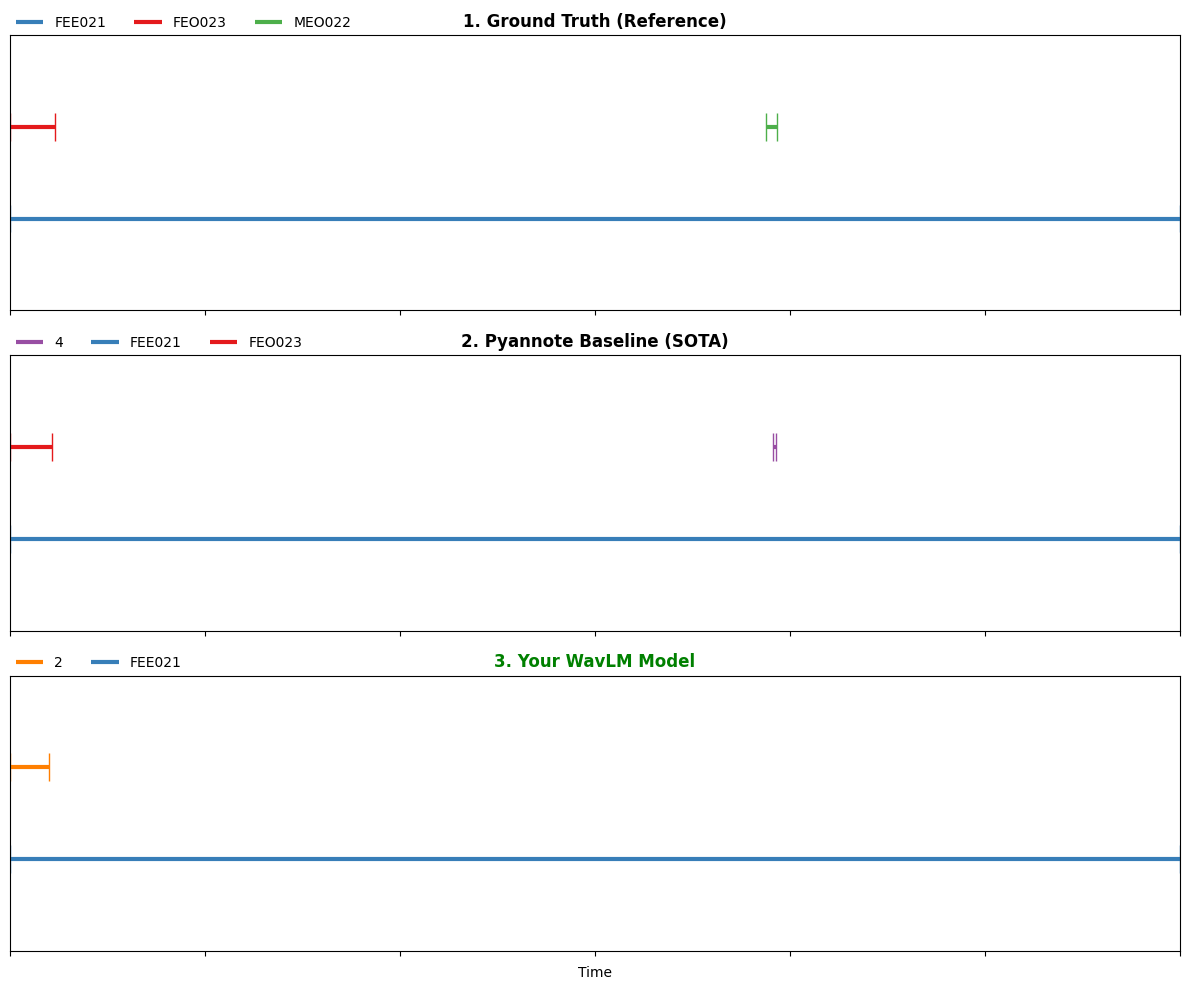

In [12]:
# Import the function we just created
from src.vizualization import visualize_comparison

# Run it!
# You can change file_index=1 or file_index=2 to see different meetings
visualize_comparison(file_index=0, crop_start=30, crop_end=60)

In [29]:
!git status

Refresh index: 100% (126/126), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   data/ami_mini/annotations/ES2002a.rttm
	modified:   data/ami_mini/annotations/ES2003a.rttm
	modified:   data/ami_mini/annotations/ES2004a.rttm
	modified:   data/ami_mini/annotations/ES2005a.rttm
	modified:   data/ami_mini/annotations/ES2006a.rttm
	modified:   data/ami_mini/annotations/ES2007a.rttm
	modified:   data/ami_mini/annotations/ES2008a.rttm
	modified:   data/ami_mini/annotations/ES2009a.rttm
	modified:   data/ami_mini/annotations/ES2010a.rttm
	modified:   data/ami_mini/annotations/ES2011a.rttm
	modified:   data/ami_mini/annotations/ES2012a.rttm
	modified:   data/ami_mini/annotations/ES2013a.rttm
	modified:   data/ami_mini/annotations/ES2014a.rttm
	modified:   data/ami_mini/annotations/ES2015a.rttm
	modified

In [35]:
!git config --global user.email "chandan.kr.singh.11@gmail.com"
!git config --global user.name "chandan110791"
!git push origin main

fatal: could not read Username for 'https://github.com': No such device or address


In [34]:
!git add .
# 2. Commit your work locally
!git commit -m "WOrking EMbedding but lot to improve , 49 vs 19 "
!# 3. Force push to main (This overwrites the remote server with your local code)


On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [37]:
from google.colab import userdata

try:
    # 1. Get the token from Secrets
    token = userdata.get('GITHUB_TOKEN')

    # 2. Update the remote URL to include the token (Authorization)
    !git remote set-url origin https://{token}@github.com/chandan110791/diarization_imp.git

    # 3. Push to main
    !git push origin main --force

    print("✅ Code pushed successfully! Time to sleep. 🛌")

except Exception as e:
    print(f"❌ Error: {e}")
    print("Double-check that the secret name is exactly 'GITHUB_TOKEN' in the key icon menu.")

Enumerating objects: 203, done.
Counting objects: 100% (203/203), done.
Delta compression using up to 2 threads
Compressing objects: 100% (164/164), done.
Writing objects: 100% (203/203), 708.03 MiB | 17.42 MiB/s, done.
Total 203 (delta 64), reused 116 (delta 28), pack-reused 0
remote: Resolving deltas: 100% (64/64), done.
To https://github.com/chandan110791/diarization_imp.git
 + 23b4afe...c3f0bc7 main -> main (forced update)
✅ Code pushed successfully! Time to sleep. 🛌
